## Smishing Detector

## Introduction

In today's digital age, where smartphones are an integral part of our lives, SMS (Short Message Service) has become a common means of communication. While SMS messages are often used for legitimate purposes, they can also be exploited for malicious activities, such as phishing. Smishing, a portmanteau of "SMS" and "phishing," is a form of cyberattack in which attackers use deceptive SMS messages to trick recipients into revealing sensitive information or clicking on malicious links.

The rise of smishing attacks has prompted the need for effective tools to detect and mitigate such threats. In this Jupyter Notebook, we will explore the development of a Smishing Detector, a machine learning-based solution designed to identify and flag potentially malicious SMS messages.

## Steps
1. Loading the data
2. Data cleaning
3. Familiarizing with data & EDA
4. Visualizing the data
5. Splitting the data
6. Training the data
7. Comparision of Model
8. Exporting of model

In [30]:
#Importing pandas and numpy
import numpy as np
import pandas as pd

## 1. IMPORTING AND VIEW OF THE DATA

In [31]:
dataset = pd.read_csv('smishing.csv')

In [32]:
#dataset.head()
#dataset.sample(5)
dataset.tail()

,LABEL,TEXT,URL,EMAIL,PHONE
6101,legit,"Madera ambiri akuzizira m'Malawi muno, yimbani...",No,No,yes
6102,legit,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...,No,No,yes
6103,legit,Pezani mwayi opata mphoto yokwana MK5Mil ndiku...,No,No,yes
6104,legit,Unduna wa za Umoyo ukulimbikitsa inu kukalandi...,No,No,yes
6105,legit,Unduna wa za umoyo ukukulimbikitsani kuti muka...,No,No,yes


In [34]:
dataset.shape

(6106, 5)

## 1.1. INSPECTION OF DATA

In [35]:
dataset.groupby('LABEL').describe()

TEXT                                                                 \
         count unique                                                top freq   
LABEL                                                                           
legit     4871   4858  Get 30 FREE minutes valid 72 Hrs by spending m...    2   
smishing  1235   1220  Ndine AGENT Ndapasilidwa Ndalama Kuti Ndikutum...    2   

           URL                  EMAIL                  PHONE                    
         count unique top  freq count unique top  freq count unique  top  freq  
LABEL                                                                           
legit     4871      2  No  4863  4871      2  No  4870  4871      2   No  4837  
smishing  1235      2  No  1036  1235      2  No  1217  1235      2  yes   862

In [36]:
dataset.groupby('URL').describe()

LABEL                         TEXT         \
    count unique       top  freq count unique   
URL                                             
No   5899      2     legit  4863  5899   5873   
yes   207      2  smishing   199   207    205   

                                                            EMAIL             \
                                                   top freq count unique top   
URL                                                                            
No   You have 1 new voicemail. Please call 08719181...    2  5899      2  No   
yes  XXXMobileMovieClub: To use your credit, click ...    2   207      2  No   

          PHONE                   
     freq count unique top  freq  
URL                               
No   5883  5899      2  No  5081  
yes   204   207      2  No   129

In [37]:
dataset.groupby('EMAIL').describe()

LABEL                         TEXT         \
      count unique       top  freq count unique   
EMAIL                                             
No     6087      2     legit  4870  6087   6059   
yes      19      2  smishing    18    19     19   

                                                                URL         \
                                                     top freq count unique   
EMAIL                                                                        
No     Is there coming friday is leave for pongal?do ...    2  6087      2   
yes    tddnewsletter@emc1.co.uk (More games from TheD...    1    19      2   

                PHONE                   
      top  freq count unique top  freq  
EMAIL                                   
No     No  5883  6087      2  No  5197  
yes    No    16    19      2  No    13

In [38]:
dataset.groupby('PHONE').describe()

LABEL                         TEXT         \
      count unique       top  freq count unique   
PHONE                                             
No     5210      2     legit  4837  5210   5197   
yes     896      2  smishing   862   896    884   

                                                                URL         \
                                                     top freq count unique   
PHONE                                                                        
No     The greatest test of courage on earth is to be...    2  5210      2   
yes    Had your mobile 11 months or more? U R entitle...    2   896      2   

                EMAIL                   
      top  freq count unique top  freq  
PHONE                                   
No     No  5081  5210      2  No  5197  
yes    No   818   896      2  No   890

## 2. DATA CLEANING
        Checking for missing values
        Checking for duplicate values
        Removing duplicates
        Droping unwanted columns
        Renaming columns
        Converting target values into numerical values

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6106 entries, 0 to 6105
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   6106 non-null   object
 1   TEXT    6106 non-null   object
 2   URL     6106 non-null   object
 3   EMAIL   6106 non-null   object
 4   PHONE   6106 non-null   object
dtypes: object(5)
memory usage: 238.6+ KB


In [40]:
#Missing values
dataset.isnull().sum()

LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64

In [41]:
# Check for duplicate values
dataset.duplicated().sum()

25

In [42]:
# Remove dulicates
dataset = dataset.drop_duplicates(keep = 'first')

In [43]:
dataset.duplicated().sum()

0

In [44]:
dataset.shape

(6081, 5)

In [45]:
# Drop last 3 columns
dataset.drop(columns = ['URL', 'EMAIL', 'PHONE'], inplace = True)

In [46]:
dataset

,LABEL,TEXT
0,legit,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,legit,What's up? Do you want me to come online? If y...
2,legit,So u workin overtime nigpun?
3,legit,"Also sir, i sent you an email about how to log..."
4,smishing,Please Stay At Home. To encourage the notion o...
...,...,...
6101,legit,"Madera ambiri akuzizira m'Malawi muno, yimbani..."
6102,legit,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...
6103,legit,Pezani mwayi opata mphoto yokwana MK5Mil ndiku...
6104,legit,Unduna wa za Umoyo ukulimbikitsa inu kukalandi...


In [47]:
# Renaming the columns
dataset.rename(columns = {'LABEL' : 'target', 'TEXT' : 'message'}, inplace = True)

In [48]:
dataset

,target,message
0,legit,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,legit,What's up? Do you want me to come online? If y...
2,legit,So u workin overtime nigpun?
3,legit,"Also sir, i sent you an email about how to log..."
4,smishing,Please Stay At Home. To encourage the notion o...
...,...,...
6101,legit,"Madera ambiri akuzizira m'Malawi muno, yimbani..."
6102,legit,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...
6103,legit,Pezani mwayi opata mphoto yokwana MK5Mil ndiku...
6104,legit,Unduna wa za Umoyo ukulimbikitsa inu kukalandi...


In [49]:
#Converting the target into numerical values
#Label smishing message as 1; legit message as 0;

#We can use the two methods below to turn the target into numerical values

#dataset.loc[df['target'] == 'legit', 'target',] = 0
#dataset.loc[df['target'] == 'smishing', 'target',] = 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
encoder.fit_transform(dataset['target'])

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
dataset['target'] = encoder.fit_transform(dataset['target'])

In [52]:
dataset

,target,message
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...
...,...,...
6101,0,"Madera ambiri akuzizira m'Malawi muno, yimbani..."
6102,0,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...
6103,0,Pezani mwayi opata mphoto yokwana MK5Mil ndiku...
6104,0,Unduna wa za Umoyo ukulimbikitsa inu kukalandi...


In [53]:
dataset.shape

(6081, 2)

## 3. EXPLORATORY DATA ANALYSIS

In [54]:
dataset['target'].value_counts()

0    4858
1    1223
Name: target, dtype: int64

Matplotlib is building the font cache; this may take a moment.


([<matplotlib.patches.Wedge at 0x1e91e3eea30>,
 [Text(-0.8876418119058163, 0.649686088627854, 'legit'),
  Text(0.8876418119058165, -0.6496860886278537, 'smishing')],
 [Text(-0.48416826103953603, 0.3543742301606476, '79.89'),
  Text(0.4841682610395362, -0.35437423016064745, '20.11')])

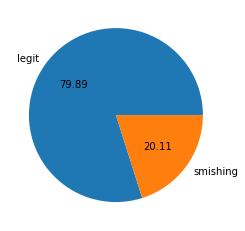

In [55]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels = ['legit', 'smishing'], autopct = "%0.2f")

In [61]:
import nltk

In [62]:
!pip install nltk

In [66]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIMEON.A.MATAKA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
#Finding the length of texts
dataset['num_characters'] = dataset['message'].apply(len)

In [68]:
dataset.head()

,target,message,num_characters
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136
1,0,What's up? Do you want me to come online? If y...,79
2,0,So u workin overtime nigpun?,28
3,0,"Also sir, i sent you an email about how to log...",173
4,1,Please Stay At Home. To encourage the notion o...,152


In [69]:
# num of words
dataset['num_of_words'] = dataset['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [70]:
dataset.head()

,target,message,num_characters,num_of_words
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37
1,0,What's up? Do you want me to come online? If y...,79,20
2,0,So u workin overtime nigpun?,28,6
3,0,"Also sir, i sent you an email about how to log...",173,37
4,1,Please Stay At Home. To encourage the notion o...,152,27


In [71]:
#num of sentences
dataset['num_sentences'] = dataset['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [72]:
dataset.head()

,target,message,num_characters,num_of_words,num_sentences
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11
1,0,What's up? Do you want me to come online? If y...,79,20,3
2,0,So u workin overtime nigpun?,28,6,1
3,0,"Also sir, i sent you an email about how to log...",173,37,3
4,1,Please Stay At Home. To encourage the notion o...,152,27,4


In [73]:
dataset[['num_characters', 'num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,6081.000000,6081.000000,6081.000000
mean,83.645453,18.972209,1.993587
std,58.614409,12.994852,1.433318
min,2.000000,1.000000,1.000000
25%,38.000000,9.000000,1.000000
50%,67.000000,16.000000,2.000000
75%,127.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
#legit
dataset[dataset['target'] == 0][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,4858.000000,4858.000000,4858.000000
mean,71.098600,17.222314,1.824207
std,56.374234,13.447141,1.385227
min,2.000000,1.000000,1.000000
25%,34.000000,8.250000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#smishing
dataset[dataset['target'] == 1][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,1223.000000,1223.000000,1223.000000
mean,133.484056,25.923140,2.666394
std,36.749912,7.806517,1.423985
min,18.000000,2.000000,1.000000
25%,117.000000,22.000000,2.000000
50%,143.000000,27.000000,2.000000
75%,156.000000,31.000000,3.000000
max,383.000000,75.000000,9.000000


## 3.1. GRAPHICAL REPRESENTATION

In [76]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

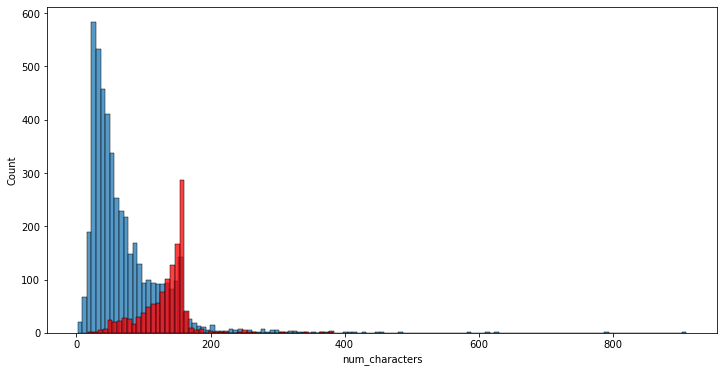

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_characters'])
sns.histplot(dataset[dataset['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

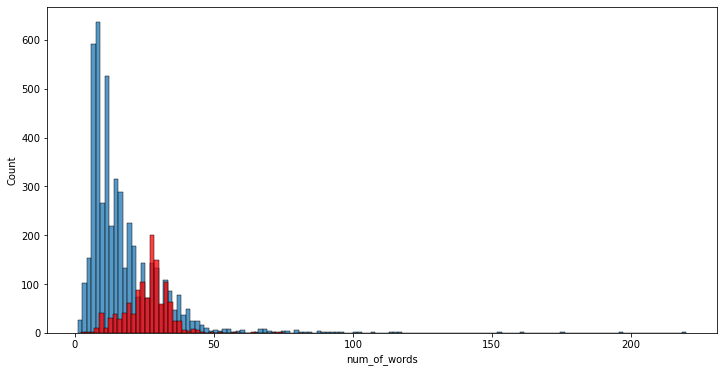

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_of_words'])
sns.histplot(dataset[dataset['target'] == 1]['num_of_words'], color = 'red')

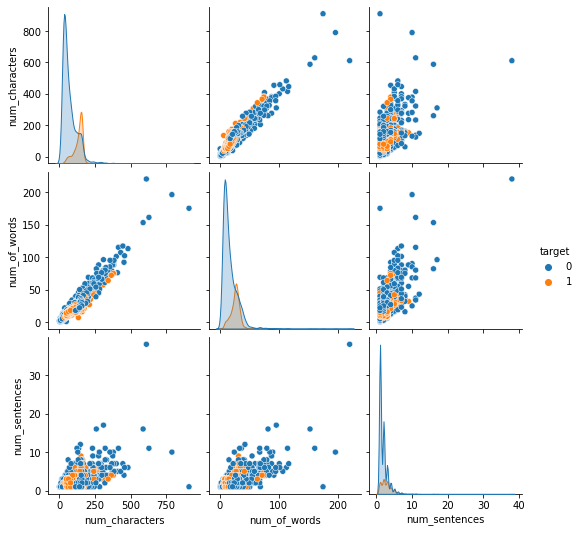

In [79]:
#comparing
sns.pairplot(dataset,hue='target')

<AxesSubplot:>

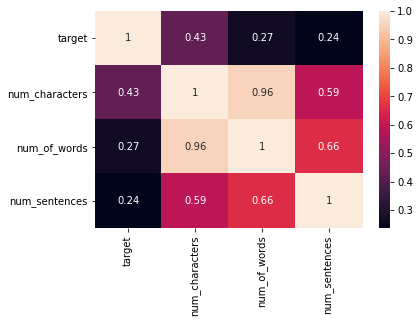

In [80]:
sns.heatmap(dataset.corr(), annot=True)

## 4. DATA PREPROCESSING
        Lower case
        Tokenization
        Removing special characters
        Removing stop words and punctuation
        Stemming

In [81]:
import nltk
!pip install nltk

In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIMEON.A.MATAKA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [85]:

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

def transform_text(text):
    #Lowercase
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #alpha numerical values
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [86]:
dataset['transformed_messages'] = dataset['message'].apply(transform_text)

In [87]:
dataset

,target,message,num_characters,num_of_words,num_sentences,transformed_messages
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11,opinion jada kusruthi lovabl silent spl charac...
1,0,What's up? Do you want me to come online? If y...,79,20,3,want come onlin free talk
2,0,So u workin overtime nigpun?,28,6,1,u workin overtim nigpun
3,0,"Also sir, i sent you an email about how to log...",173,37,3,also sir sent email log usc payment portal sen...
4,1,Please Stay At Home. To encourage the notion o...,152,27,4,pleas stay home encourag notion stay home citi...
...,...,...,...,...,...,...
6101,0,"Madera ambiri akuzizira m'Malawi muno, yimbani...",114,18,1,madera ambiri akuzizira muno yimbani 321 mwaul...
6102,0,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...,154,27,4,tiketi imodzi yaulel ya mk500 ikudikila inu mu...
6103,0,Pezani mwayi opata mphoto yokwana MK5Mil ndiku...,159,25,2,pezani mwayi opata mphoto yokwana mk5mil ndiku...
6104,0,Unduna wa za Umoyo ukulimbikitsa inu kukalandi...,142,22,1,unduna wa za umoyo ukulimbikitsa inu kukalandi...


## 5. MODEL BUILDING
        Importing model packages
        Spliting data into test_set and train_set
        Converting the messages into numerical data (encoding)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [89]:
X = dataset['transformed_messages']

In [90]:
X.shape

(6081,)

In [91]:
Y = dataset['target'].values

In [92]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [95]:
#Transform the text data to feature vectors that can be used as input to the Model

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


#Convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [96]:
X_train.head(10)

2579                         sorri call later urgent work
904                                                   see
2537                                   k u bore come home
109                                         sir wait call
6070    miracl money satansm church mwina mwakhala muk...
5416    yeah got 2 v apologet n fallen actin like spoi...
5112    dude avatar 3d imp one point thought actual fl...
2838    sorri man accident left phone silent last nigh...
3732    heard anyth answer text guess flake said jb fa...
5197                               wat happen cruis thing
Name: transformed_messages, dtype: object

In [97]:
print(X_train_features)

  (0, 6645)	0.488861559038191
  (0, 6349)	0.5178478740872305
  (0, 3557)	0.5079568816842077
  (0, 5613)	0.4845903029856673
  (2, 3021)	0.5169335499290749
  (2, 1759)	0.4551837749043364
  (2, 1368)	0.7249740933451093
  (3, 6485)	0.6301867136255204
  (3, 5495)	0.7764436270392503
  (4, 391)	0.2647350944379083
  (4, 159)	0.2647350944379083
  (4, 535)	0.23167246177967557
  (4, 3145)	0.252532660455158
  (4, 3944)	0.2647350944379083
  (4, 4099)	0.2647350944379083
  (4, 3339)	0.1794698074907745
  (4, 3498)	0.178597430317141
  (4, 1500)	0.2647350944379083
  (4, 1676)	0.24387489576242588
  (4, 1685)	0.21947002779692526
  (4, 4093)	0.21947002779692526
  (4, 4150)	0.23167246177967557
  (4, 4161)	0.2647350944379083
  (4, 1686)	0.2270333116866757
  (4, 5294)	0.2647350944379083
  :	:
  (4860, 3053)	0.21640648544981375
  (4860, 6513)	0.1964884576896605
  (4860, 2352)	0.27151576450063475
  (4860, 6026)	0.1866940652831435
  (4861, 6337)	0.31333237501494265
  (4861, 307)	0.29888994671167524
  (4861, 2620

In [98]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6081,)
(4864,)
(1217,)
(4864,)
(1217,)


In [99]:
!pip install xgboost

In [100]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

#Algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [102]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xbg = XGBClassifier(n_estimators = 50, random_state = 2)
lgb = lgb.LGBMClassifier()

In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rf,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xbg' : xbg,
    'lgb' : lgb,
}

In [104]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [105]:
#train_classifier(knc, X_train_features, y_train, X_test_features, y_test)

In [106]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train_features, y_train, X_test_features, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9769926047658176
Precision -  0.9675925925925926
For  KN
Accuracy -  0.8833196384552178
Precision -  1.0
For  NB
Accuracy -  0.971240755957272
Precision -  0.9899497487437185
For  DT
Accuracy -  0.895645028759244
Precision -  0.8705035971223022
For  LR
Accuracy -  0.9482333607230896
Precision -  0.9326424870466321
For  RF
Accuracy -  0.8488085456039441
Precision -  1.0
For  AdaBoost
Accuracy -  0.9391947411668036
Precision -  0.8861386138613861
For  BgC
Accuracy -  0.9589153656532456
Precision -  0.8913043478260869
For  ETC
Accuracy -  0.9745275267050123
Precision -  0.9806763285024155
For  GBDT
Accuracy -  0.914543960558751
Precision -  0.9565217391304348
For  xbg
Accuracy -  0.9515201314708299
Precision -  0.9430051813471503
[LightGBM] [Info] Number of positive: 993, number of negative: 3871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

In [107]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy', ascending = False)

In [108]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976993,0.967593
8,ETC,0.974528,0.980676
2,NB,0.971241,0.989950
11,lgb,0.966311,0.943662
7,BgC,0.958915,0.891304
10,xbg,0.951520,0.943005
4,LR,0.948233,0.932642
6,AdaBoost,0.939195,0.886139
9,GBDT,0.914544,0.956522
3,DT,0.895645,0.870504


In [109]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [110]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.976993
1,ETC,Accuracy,0.974528
2,NB,Accuracy,0.971241
3,lgb,Accuracy,0.966311
4,BgC,Accuracy,0.958915
5,xbg,Accuracy,0.951520
6,LR,Accuracy,0.948233
7,AdaBoost,Accuracy,0.939195
8,GBDT,Accuracy,0.914544
9,DT,Accuracy,0.895645


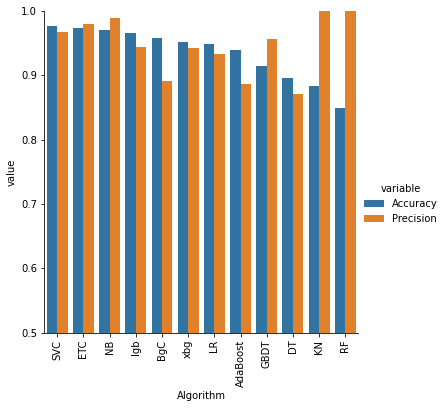

In [111]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind ='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [112]:
svc.fit(X_train_features, y_train) 

SVC(gamma=1.0, kernel='sigmoid')

In [113]:
prediction_on_test_data = svc.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [114]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9769926047658176


In [115]:
#Transforming input
x = transform_text('Muli bwanji?')

input_mail = [x]

input_data_features = feature_extraction.transform(input_mail)

#Making prediction

prediction = svc.predict(input_data_features)

print(prediction)

if prediction[0] == 0:
    print('legit')
else:
    print('smishing')

[0]
legit


In [116]:
import pickle
pickle.dump(feature_extraction, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))